# Preparación de la Notebook



In [ ]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

#!apt install  openbabel

# import rdkit
import pandas as pd
import numpy as np
# from rdkit.Chem import PandasTools

!pip install git+https://github.com/autonomio/talos@1.0

  Cloning https://github.com/autonomio/talos (to revision 1.0) to /tmp/pip-req-build-df3jxa38
  Running command git clone -q https://github.com/autonomio/talos /tmp/pip-req-build-df3jxa38
  Running command git checkout -b 1.0 --track origin/1.0
  Switched to a new branch '1.0'
  Branch '1.0' set up to track remote branch '1.0' from 'origin'.
     |████████████████████████████████| 8.7MB 8.3MB/s 
     |████████████████████████████████| 2.6MB 47.0MB/s 
  Created wheel for talos: filename=talos-1.0-cp36-none-any.whl size=53700 sha256=708ac26cdef0d75efe07eadacb56e326eecb406bf30a101cbb6810af812a70d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-9v8qv31v/wheels/9f/14/d1/e58012a97c43cf2148959890b171f49e4a5e1c82a9946b2c22
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=805e43d780f014ce0b3db25e5263c4fcb5332bd954706f731f32fbe483886fe1
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wh

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
%cd drive/My Drive/finalRedes
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1vnOFBVFFehrvQ_ZlIpZVR7M-VhQvq5p-/finalRedes
bestmodel.hdf5			   tox21_SCAN4_activations_firstNeuron
Descriptores_nr_ar.csv		   tox21_SCAN4_activations_initializers
Descriptores_nr_er.csv		   tox21_SCAN4_activations_initializers2
Descriptores_test.csv		   tox21_SCAN4_relu_dropANDhiddenLayers
Descriptores_test_new.csv	   tox21_SCAN4_relu_dropout
logs				   tox21_SCAN4_relu_dropout_bathcNorm
Miniconda3-latest-Linux-x86_64.s

# Preparación de los datos

Archivo con Descriptores calculados para el efecto toxico NR-ER.

In [ ]:
desc_path = 'Descriptores_nr_er.csv' #Este archivo se obtuvo con la notebook tox21_DescriptorsCalc
descriptores = pd.read_csv(desc_path)
descriptores

,Unnamed: 0,abonds,atoms,bonds,cansmi,cansmiNS,dbonds,formula,HBA1,HBA2,HBD,InChI,InChIKey,L5,logP,MP,MR,MW,nF,rotors,s,sbonds,smarts,tbonds,title,TPSA,CHARGE
0,0,11.0,42.0,44.0,0.0,0.0,0.0,0.0,19.0,3.0,2.0,0.0,0.0,0.0,4.7767,133.0267,86.5125,378.312159,6.0,4.0,0.0,33.0,0.0,0.0,0.0,45.15,0
1,1,18.0,69.0,73.0,0.0,0.0,0.0,0.0,39.0,4.0,0.0,0.0,0.0,0.0,6.1944,139.7661,140.9350,457.603800,0.0,7.0,0.0,55.0,0.0,0.0,0.0,30.93,0
2,2,17.0,30.0,32.0,0.0,0.0,0.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,2.5770,298.4234,73.7772,253.262640,0.0,1.0,0.0,15.0,0.0,0.0,0.0,129.62,0
3,3,12.0,59.0,61.0,0.0,0.0,4.0,0.0,28.0,4.0,2.0,0.0,0.0,0.0,7.0394,202.9346,133.0344,494.475279,6.0,7.0,0.0,45.0,0.0,0.0,0.0,48.78,0
4,4,0.0,92.0,91.0,0.0,0.0,0.0,0.0,64.0,3.0,0.0,0.0,0.0,0.0,7.9826,8.9656,145.4004,474.855700,0.0,25.0,0.0,91.0,0.0,0.0,0.0,27.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7692,7692,6.0,21.0,21.0,0.0,0.0,2.0,0.0,12.0,2.0,2.0,0.0,0.0,0.0,1.3850,179.0045,46.8274,170.232100,0.0,2.0,0.0,13.0,0.0,0.0,0.0,80.74,0
7693,7693,0.0,12.0,12.0,0.0,0.0,1.0,0.0,9.0,3.0,2.0,0.0,0.0,0.0,0.1217,82.7273,35.6454,102.158140,0.0,0.0,0.0,11.0,0.0,0.0,0.0,56.15,0
7694,7694,0.0,12.0,12.0,0.0,0.0,1.0,0.0,9.0,3.0,2.0,0.0,0.0,0.0,0.1217,82.7273,35.6454,102.158140,0.0,0.0,0.0,11.0,0.0,0.0,0.0,56.15,0
7695,7695,6.0,32.0,32.0,0.0,0.0,2.0,0.0,19.0,4.0,0.0,0.0,0.0,0.0,4.4449,42.3956,73.9150,291.260621,0.0,7.0,0.0,24.0,0.0,0.0,0.0,115.41,0


Obtenemos el vector de clases segun las actividades

0 : inactivo

1 : activo

In [ ]:
#Read target.
actives_f = open("nr_er_activity.txt", "r") #Este archivo se obtuvo de la columna de Actividad del SDF.
activity = []
for x in actives_f:
  activity.append(x[0])
#activity = activity[1:]
activity = [int(i) for i in activity]
y = np.array(activity)
print(y.shape)
actives_f.close()

(7697,)


Vemos la distribucion de Activos e Inactivos

In [ ]:
#Visualizar activos vs inactivos: 
activos = sum(y)
inactivos = sum((y == 0)*1)
indices = ['Activos','Inactivos']
print('Proporcion de activos en el dataset:', activos/(activos+inactivos))
activity_df = pd.DataFrame(data = [activos, inactivos], columns = ['NR-ER'], index = indices)
activity_df

Proporcion de activos en el dataset: 0.1217357411978693


,NR-ER
Activos,937
Inactivos,6760


Train - Validation split

In [ ]:
#Train-Val Split. 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(descriptores.values, y, test_size =0.1,random_state = 42, stratify=activity)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6927, 27)
(770, 27)
(6927,)
(770,)


# Procesamiento

Normalización

In [ ]:
from sklearn.preprocessing import StandardScaler

desc_scaler = StandardScaler()
X_train = desc_scaler.fit_transform(X_train)
Scaled_descriptors = pd.DataFrame(X_train, columns=descriptores.columns)
Scaled_descriptors.head()

,Unnamed: 0,abonds,atoms,bonds,cansmi,cansmiNS,dbonds,formula,HBA1,HBA2,HBD,InChI,InChIKey,L5,logP,MP,MR,MW,nF,rotors,s,sbonds,smarts,tbonds,title,TPSA,CHARGE
0,-0.867422,0.061204,0.681038,0.628320,0.0,0.0,-0.267463,0.0,0.776294,-0.191243,-0.088211,0.0,0.0,0.0,0.631796,-0.323901,0.492766,0.159438,-0.148362,0.746655,0.0,0.686063,0.0,-0.168185,0.0,-0.474732,0.113714
1,-0.218618,0.061204,-0.696640,-0.695395,0.0,0.0,-0.890852,0.0,-0.664650,-0.746224,-0.088211,0.0,0.0,0.0,-0.607300,-0.709506,-0.772663,-0.858691,-0.148362,-0.522930,0.0,-0.697721,0.0,-0.168185,0.0,-0.677815,0.113714
2,0.849975,0.061204,-0.554122,-0.558459,0.0,0.0,-0.267463,0.0,-0.520556,-0.191243,-0.636224,0.0,0.0,0.0,-0.466974,-0.482779,-0.583903,-0.568211,-0.148362,-0.311333,0.0,-0.598879,0.0,-0.168185,0.0,-0.421236,0.113714
3,-0.431886,0.061204,0.015952,-0.010714,0.0,0.0,-0.890852,0.0,0.127869,-0.191243,1.007816,0.0,0.0,0.0,-0.138689,-0.095840,-0.162152,-0.283662,-0.148362,0.323460,0.0,0.043592,0.0,-0.168185,0.0,-0.136819,0.113714
4,-1.397894,-0.992992,0.633532,0.719611,0.0,0.0,0.979316,0.0,0.560152,-0.468734,-0.636224,0.0,0.0,0.0,0.756467,0.446433,0.420815,0.225386,-0.148362,-0.946125,0.0,0.982589,0.0,-0.168185,0.0,-0.444546,0.113714


In [ ]:
#Validation Scale:
X_val = desc_scaler.transform(X_val)

Paquetes de procesamiento


In [ ]:
import keras
from keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.metrics import AUC, TruePositives, FalsePositives, FalseNegatives
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization, PReLU, ELU, LeakyReLU
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras import optimizers, initializers
from tensorflow.keras.optimizers import SGD, Adam
from keras.initializers import glorot_uniform, he_uniform, uniform, Constant
from keras.constraints import maxnorm
from keras.regularizers import l2

import talos
import datetime
from keras.callbacks import TensorBoard
from talos.model.network_shape import network_shape
from talos.model.normalizers import lr_normalizer
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint

Using TensorFlow backend.


## Busqueda de Hiperparametros

Busqueda de Hiperparametros con Talos Scan

Callbacks

In [ ]:
from keras import backend as K

def fbeta(y_true, y_pred, threshold_shift=0.2, beta = 2):

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred - threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())


In [ ]:

def tox21_model(x,y,params): 
    model = Sequential()

    # Input layer
    model.add(Dense(params['first_neuron'], input_shape = (X_train.shape[1],), 
                    kernel_initializer=params['kernel_initializer'],
                    activation = params['activation']))
    # Input Dropout layer
    if(params['dropout']>0):
        model.add(Dropout(params['dropout']))

    # Hidden layers
    layer_neurons = network_shape(params,1)

    for i in range(params['hidden_layers']):

        # Normalization layer
        if params['batch_norm']==True:
            model.add(BatchNormalization())

        # Dense layer
        model.add(Dense(layer_neurons[i],
                        kernel_initializer=params['kernel_initializer'],
                        kernel_regularizer = params['kernel_regularizer'],
                        activity_regularizer = params['activity_regularizer'],
                        use_bias=True))
        
        # Activation function  
        if params['activation']=='prelu':
            model.add( PReLU(alpha_initializer = Constant(value=params['alpha_initializer']) ))
        elif params['activation']=='elu':
            model.add(ELU(alpha=0.5))
        elif params['activation']=='leaky_relu':
            model.add(LeakyReLU())
        else:
            model.add(Activation(params['activation']))

        # Dropout layer
        if(params['dropout']>0):
            model.add(Dropout(params['dropout']/2))

    # Output Layer
    model.add(Dense(1, kernel_initializer=params['kernel_initializer'], activation = 'sigmoid'))


    # Optimizer
    opt = optimizers.Adam(
                learning_rate=lr_normalizer(params['lr'],Adam),
                beta_1=0.9,
                beta_2=0.999,
                epsilon=1e-7,
                amsgrad=False)
    
    model.compile(loss='binary_crossentropy', optimizer=opt ,metrics=[metrics.AUC(curve='PR'),fbeta])#,
    
    return model

def tox21_talos(x, y, x_v, y_v, params):

    # Create model
    model = tox21_model(x,y,params)

    print("_____________________________________________________________________")
    for key in params:
        print(f"{key:20}{params[key]}")

    print(model.summary())

    # logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    es = EarlyStopping(monitor='val_loss', verbose=1, patience=25, restore_best_weights = True)
    reduceLR=ReduceLROnPlateau(monitor='val_loss', 
                            factor=0.2, 
                            patience=10, 
                            verbose=1, 
                            min_delta=0, 
                            cooldown=0, min_lr=0)

    history = model.fit(x, y, validation_data = (x_v, y_v),
                        batch_size = params['batch_size'],
                        epochs = params['epochs'],
                        class_weight = params['class_weight'],
                        callbacks=[es,reduceLR,prScore], #,TensorBoard(logdir, histogram_freq=1)
                        verbose=2)
    
    return history, model

Hiperparametros

Diccionario con los hiperparametros a evaluar. Debido a que la cantidad de hiperparametros es muy grande, se realizo una busqueda por partes para minimizar el tiempo de computo. Esta busqueda conistio en dejar fijos algunos hiperparametros y variar otros, siguiendo un orden:

1. Funciones de activacion e inicializadores

        Funciones de activacion: {Relu, Prelu, LeakyRelu, Helu, Tanh}

        Inicializadores: {Random_uniform, Random_normal, He_uniform, He_normal, Glorot_normal}

2. Neuronas, Hidden Layers, Shapes

        Neuronas: {64, 256, 512, 1024}

        Hidden Layers: {3,4,5}

        Shapes: {Brick, Triangle, Funnel}

3. Regularizacion, Dropout, Batch Normalization
        
        Regularizacion: {None, l1, l2}

        Dropout: {0, 0.2, 0.4}

        Batch Normalization: {True, False}
4. Class Weight 
        class_weight: {None,{0:1.,1:2.},{0:1.,1:3.},{0:1.,1:5.},{0:1.,1:10.}}
        

In [ ]:
p = {
    'first_neuron': [512],                 # Tamaño de la primera capa
    'dropout': [0,0.3],                    # Valor de dropout luego de la primera capa
    'activation': ['relu','tanh'],                # Función de activación
    'alpha_initializer': [0.2],             # PRELU alpha
    'batch_size': [256],#, 512],                    # Tamaño de batch
    'epochs': [400],                        # Number of epochs
    'batch_norm': [True],                   # Batch normalization layers
    'hidden_layers':[5],                    # Number of hidde layers
    'shapes':['brick'],                     # Shape of hidden layers
    'optimizer': [Adam],    # Optimizer
    'class_weight': [None,{0:1.,1:2.},{0:1.,1:3.},{0:1.,1:5.},{0:1.,1:10.}],
    'kernel_regularizer':[None,'l2'],            # Kernel (weights) regularization
    #'bias_regularizer':[None],             # Bias (offsets) regularization
    'activity_regularizer':[None],          # Activity (output) regularization
    'kernel_initializer': ['random_normal','he_uniform'], # Kernel (weights) initializer
    'lr': [0.1]                              # Learning rate
}

Talos Scan

Se realiza el scan con cada grupo de hiperparametros y se guardan los resultados en distintos CSVs.

In [ ]:
%matplotlib inline
%reload_ext tensorboard

scan = talos.Scan (x=X_train,
                    y=y_train,
                    model=tox21_talos,
                    experiment_name='tox21_SCAN_nr_er_class_weight2',
                    #fraction_limit=0.004,
                    #round_limit = 200,
                    random_method = 'uniform_mersenne' ,
                    x_val=X_val,
                    y_val=y_val,
                    params=p,
                    print_params=False,) 

#El output de esta funcion se guarda en un archivo csv que permite visualizar los resultados de las metricas para cada combinacion de HP.
    

## Modelo con mejores hiperparametros

Definicion del modelo

Se define el modelo de acuerdo con los hiperparametros que dieron mejor resultado, los cuales se definieron inspeccionando los CSVs creados en la seccion anterior.

In [ ]:

model = Sequential()

model.add(Dense(512, input_dim = X_train.shape[1], kernel_initializer='he_uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512,kernel_regularizer = None, kernel_initializer='he_uniform', activation ='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(512,kernel_regularizer = None,kernel_initializer='he_uniform', activation = 'relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(512,kernel_regularizer = None,kernel_initializer='he_uniform', activation = 'relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(512,kernel_regularizer = None,kernel_initializer='he_uniform', activation = 'relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='he_uniform', activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               14336     
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)              

Optimizador y compile

Dado que las clases se encuentran desbalanceadas (88-12%), se decidio utilizar la metrica AUC, que es el area bajo la curva ROC. 

In [ ]:
optimizer = optimizers.Adam(
                learning_rate=lr_normalizer(0.1,Adam),
                beta_1=0.9,
                beta_2=0.999,
                epsilon=1e-7,
                amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=[AUC(curve='PR'),fbeta])

Callbacks

Se utilizara Early Stopping para detener el entrenamiento cuando la "val_loss" deje de mejorar, guardandose los pesos del mejor modelo. Tambien se utilizara el callback ReduceLROnPlateau para disminuir el Learning Rate cuando la "val_loss" no mejore.

In [ ]:
from keras.callbacks import Callback

es = EarlyStopping(monitor='val_loss', verbose=1, patience=55, restore_best_weights = True)
reduceLR=ReduceLROnPlateau(monitor='val_loss', 
                            factor=0.2, 
                            patience=10, 
                            verbose=1, 
                            min_delta=0, 
                            cooldown=0, min_lr=0)

checkpoint_filepath = 'bestmodel.hdf5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_fbeta',
    mode='max')

Entrenamiento

Se entrena el modelo planteado

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=256, 
                 validation_data=(X_val, y_val),
                 epochs=400, 
                 verbose=2,
                 shuffle=True, 
                 callbacks=[model_checkpoint_callback, reduceLR,es],
                 class_weight={0:1.,1:4})

Train on 6927 samples, validate on 770 samples
Epoch 1/400
 - 1s - loss: 0.9899 - auc_14: 0.2074 - fbeta: 0.4665 - val_loss: 0.6852 - val_auc_14: 0.2465 - val_fbeta: 0.3200
Epoch 2/400
 - 0s - loss: 0.8780 - auc_14: 0.2718 - fbeta: 0.5347 - val_loss: 0.6186 - val_auc_14: 0.2873 - val_fbeta: 0.4411
Epoch 3/400
 - 0s - loss: 0.8319 - auc_14: 0.3096 - fbeta: 0.5535 - val_loss: 0.5982 - val_auc_14: 0.3201 - val_fbeta: 0.5063
Epoch 4/400
 - 0s - loss: 0.8017 - auc_14: 0.3295 - fbeta: 0.5583 - val_loss: 0.5748 - val_auc_14: 0.3367 - val_fbeta: 0.5779
Epoch 5/400
 - 0s - loss: 0.7721 - auc_14: 0.3467 - fbeta: 0.5730 - val_loss: 0.5748 - val_auc_14: 0.3541 - val_fbeta: 0.6374
Epoch 6/400
 - 0s - loss: 0.7415 - auc_14: 0.3633 - fbeta: 0.5807 - val_loss: 0.5655 - val_auc_14: 0.3702 - val_fbeta: 0.6543
Epoch 7/400
 - 0s - loss: 0.7384 - auc_14: 0.3770 - fbeta: 0.5464 - val_loss: 0.5303 - val_auc_14: 0.3825 - val_fbeta: 0.6330
Epoch 8/400
 - 0s - loss: 0.7118 - auc_14: 0.3880 - fbeta: 0.5954 - val

Carga los pesos del modelo con la mejor performance de fbeta_score

In [ ]:
model.load_weights(checkpoint_filepath)

# Dataset de TEST

Archivo con los descriptores del dataset de test

In [ ]:
desc = 'Descriptores_test_new.csv' #Este archivo se obtuvo con la notebook tox21_DescriptorsCalc
descriptores_test = pd.read_csv(desc)
descriptores_test

,Unnamed: 0,abonds,atoms,bonds,cansmi,cansmiNS,dbonds,formula,HBA1,HBA2,HBD,InChI,InChIKey,L5,logP,MP,MR,MW,nF,rotors,s,sbonds,smarts,tbonds,title,TPSA,CHARGE
0,0,6.0,95.0,102.0,0.0,0.0,5.0,0.0,58.0,8.0,0.0,0.0,0.0,0.0,5.3452,323.4901,193.7180,610.831900,0.0,6.0,0.0,91.0,0.0,0.0,0.0,72.88,0
1,1,10.0,33.0,36.0,0.0,0.0,1.0,0.0,19.0,11.0,2.0,0.0,0.0,0.0,0.9645,234.5760,76.3992,407.094061,0.0,1.0,0.0,25.0,0.0,0.0,0.0,167.48,-1
2,2,21.0,35.0,39.0,0.0,0.0,1.0,0.0,15.0,3.0,1.0,0.0,0.0,0.0,3.1009,260.0716,87.4097,287.315320,0.0,0.0,0.0,17.0,0.0,0.0,0.0,50.68,0
3,3,17.0,42.0,44.0,0.0,0.0,0.0,0.0,20.0,2.0,1.0,0.0,0.0,0.0,4.4267,127.8196,87.9497,328.355826,2.0,7.0,0.0,27.0,0.0,0.0,0.0,37.91,0
4,4,12.0,41.0,42.0,0.0,0.0,3.0,0.0,22.0,4.0,1.0,0.0,0.0,0.0,4.1642,121.6301,91.2077,351.847720,0.0,7.0,0.0,27.0,0.0,0.0,0.0,71.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,642,0.0,13.0,12.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,0.0,0.0,0.0,0.2986,14.3068,25.6258,92.160020,0.0,2.0,0.0,12.0,0.0,0.0,0.0,59.03,0
643,643,0.0,36.0,36.0,0.0,0.0,0.0,0.0,27.0,6.0,3.0,0.0,0.0,0.0,-2.4309,57.7851,67.1814,219.281340,0.0,6.0,0.0,36.0,0.0,0.0,0.0,70.41,0
644,644,5.0,11.0,11.0,0.0,0.0,1.0,0.0,7.0,4.0,1.0,0.0,0.0,0.0,-0.1273,126.9533,26.4687,116.144960,0.0,0.0,0.0,5.0,0.0,0.0,0.0,78.59,0
645,645,11.0,36.0,38.0,0.0,0.0,1.0,0.0,18.0,4.0,2.0,0.0,0.0,0.0,3.3393,221.4786,86.1255,344.259400,0.0,5.0,0.0,26.0,0.0,0.0,0.0,85.93,0


Obtenemos el vector de clases segun las actividades

0 : inactivo

1 : activo


In [ ]:
#Read test targets.
actives_f = open("nr_er_test_new_activity.txt", "r") #Este archivo se obtuvo de la columna de Actividad del SDF.
test_activity = []
for i,x in enumerate(actives_f):
  if(x[0] != 'x'):
    test_activity.append(x[0])
  else:
    descriptores_test = descriptores_test.drop(i,axis =0)
test_activity = [int(i) for i in test_activity]
y_test = np.array(test_activity)
print(y_test.shape)
actives_f.close()

(516,)


Corroboramos la distribucion de clases en test

In [ ]:
#Visualizar activos vs inactivos en Test: 
activos = sum(y_test)
inactivos = sum(y_test == 0)
print('Proporcion de activos en el dataset:', activos/(activos+inactivos))
indices = ['Activos','Inactivos']
activity_df = pd.DataFrame(data = [activos, inactivos], columns = ['Test'], index = indices)
activity_df

Proporcion de activos en el dataset: 0.09883720930232558


,Test
Activos,51
Inactivos,465


Normalizacion de los datos de Test

In [ ]:
#Test Dataset Scale:
X_test = desc_scaler.transform(descriptores_test)
X_test.shape

(516, 27)

Evaluacion de Test

Funcion de evaluacion para hallar el umbral que resulta en el mejor fbeta_score

In [ ]:
from matplotlib import pyplot as plt
# from sklearn.metrics import auc, roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import fbeta_score

def best_fbeta(y_true,y_pred,plot=False,beta=2):
    thresholds = np.arange(100)/100
    scores = np.zeros(thresholds.shape)


    for i, thr in enumerate(thresholds.tolist()):
        y_pred_class = (y_pred>thr)*1
        scores[i] = fbeta_score(y_true,y_pred_class,beta=beta)

    best_score = np.max(scores)
    best_score_idx = np.argmax(scores)
    best_thr = thresholds[best_score_idx]

    if plot:
        plt.plot(thresholds,scores)  
        plt.axvline(x=best_thr,color='r')
        plt.xlabel('threshold')
        plt.ylabel('fbeta_score')
    return [best_thr,best_score]

Evaluacion de test AUC

In [ ]:
#Predict for Test:
test_pred = model.predict_proba(X_test)
#Evaluar metrica AUC en test
m = metrics.AUC()
m.update_state(y_test,test_pred)
auc_test = m.result().numpy()

print(auc_test)

0.733481


El mejor f2Score es de 0.518 y se obtiene tomando el umbral 0.52
[[602  74]
 [ 42  52]]


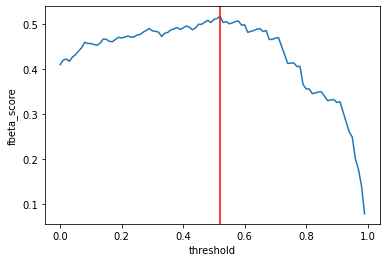

In [ ]:
from sklearn.metrics import confusion_matrix
beta=2
val_pred = model.predict_proba(X_val)
best_thr, best_score = best_fbeta(y_val,val_pred,beta=beta,plot=True)
print('El mejor f2Score es de {:.3f} y se obtiene tomando el umbral {}'.format(best_score,best_thr))
print(confusion_matrix(y_val,(val_pred>best_thr)*1))

Busqueda del umbral para el mejor fbeta_score. Se elije beta=2 para darle mas importancia al Recall (sensibilidad) ya que es mas importante clasificar bien la clase positiva (compuestos toxicos).

In [ ]:
test_pred = model.predict_proba(X_test)
fscore_test = fbeta_score(y_test,(test_pred>best_thr)*1,beta=beta)
print('El f2Score para test es de {:.3f}'.format(fscore_test))

El f2Score para test es de 0.496


Con el umbral hallado, se calcula la matriz de confusion

In [ ]:
print(confusion_matrix(y_test,(test_pred>best_thr)*1))

[[342 123]
 [ 15  36]]


# Discusión y conclusiones

Para evaluar el roc_auc score obtenido para el dataset de test se lo compara con el del equipo ganador de la competencia Tox21 Data Challenge, el unico equipo en utilizar redes neuronales. Nuestro resultado es comparable con el resultado obtenido por el equipo ganador que fue de 0.810. 

Creemos que la principal razón de la diferencia entre los resultados puede deberse a la cantidad de descriptores utilizados para la clasificación. En nuestro caso contamos únicamente con 27 descriptores mientras que en el trabajo del equipo ganador se utilizaron mas de mil descriptores. También puede deberse a la elección de los hiperparámetros.

Dado que se resulta mas importante clasificar bien la clase positiva (compuestos toxicos), se utilizo la metrica fBeta_score. La misma permite darle mas importancia a la sensibilidad del modelo si se elige Beta mayor a 1. En este caso se utilizo Beta igual a 2 ya que producia una relacion de compromiso aceptable entre los VP,VN,FN y FP. Para el set de validacion se utilizo la funcion best_fbeta para hallar el umbral que mejor score produciera. Con este umbral se realizo la clasificacion para el set de test y se realizo la matriz de confusion, en la que se puede ver una mejor clasificacion de la clase positiva que en la entrega previa.
 
